In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ydata_profiling import ProfileReport

In [50]:
df = pd.read_csv("hazardous_EAV2-6_32151-0003.csv")

In [8]:
df.head()

,Year,Federal State,Number of Waste Producers,Waste Quantity (1000 t),Waste Quantity Handed Over to Primary Producers (1000 t)
0,2006,Baden-Württemberg,3642,2046,"1,458.30"
1,2006,Bayern,4320,2495,"1,415.20"
2,2006,Berlin,617,610,521
3,2006,Brandenburg,787,882,699.7
4,2006,Bremen,309,323,215.9


Year: The year for which the data is reported, which is 2006 in this case.

Federal State: The name of the German federal state for which the waste data is recorded.

Number of Waste Producers: The number of entities or producers in that federal state responsible for generating waste.

Waste Quantity (1000 t): The total quantity of waste generated in that federal state in thousands of metric tons (1000 t).

Waste Quantity Handed Over to Primary Producers (1000 t): The amount of waste that was handed over to primary producers for further processing or management, also measured in thousands of metric tons (1000 t).

In [4]:
data['Number of Waste Producers'].describe()

count     256
unique    239
top       309
freq        3
Name: Number of Waste Producers, dtype: object

In [9]:
df.isnull().sum()

Year                                                        0
Federal State                                               0
Number of Waste Producers                                   0
Waste Quantity (1000 t)                                     0
Waste Quantity Handed Over to Primary Producers (1000 t)    0
dtype: int64

In [11]:
print(df.columns)

Index(['Year ', 'Federal State ', 'Number of Waste Producers',
       'Waste Quantity (1000 t)',
       'Waste Quantity Handed Over to Primary Producers (1000 t)'],
      dtype='object')


In [13]:
print(df.dtypes)

Year                                                         int64
Federal State                                               object
Number of Waste Producers                                   object
Waste Quantity (1000 t)                                     object
Waste Quantity Handed Over to Primary Producers (1000 t)    object
dtype: object


In [54]:
df['Number of Waste Producers'] = pd.to_numeric(df['Number of Waste Producers'], errors='coerce')


In [55]:
df['Waste Quantity (1000 t)'] = pd.to_numeric(df['Waste Quantity (1000 t)'], errors='coerce')
df['Waste Quantity Handed Over to Primary Producers (1000 t)'] = pd.to_numeric(df['Waste Quantity Handed Over to Primary Producers (1000 t)'], errors='coerce')

   Year      Federal State   Number of Waste Producers  \
0   2006  Baden-Württemberg                     3642.0   
1   2006             Bayern                     4320.0   
2   2006             Berlin                      617.0   
3   2006        Brandenburg                      787.0   
4   2006             Bremen                      309.0   

   Waste Quantity (1000 t)  \
0                   2046.0   
1                   2495.0   
2                    610.0   
3                    882.0   
4                    323.0   

   Waste Quantity Handed Over to Primary Producers (1000 t)  
0                                                NaN         
1                                                NaN         
2                                              521.0         
3                                              699.7         
4                                              215.9         
Year                                                          0
Federal State                     

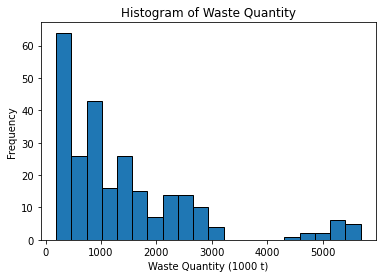

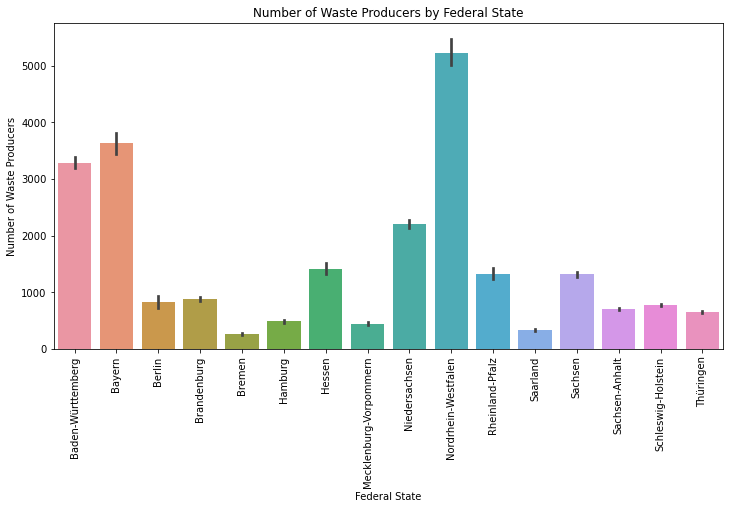

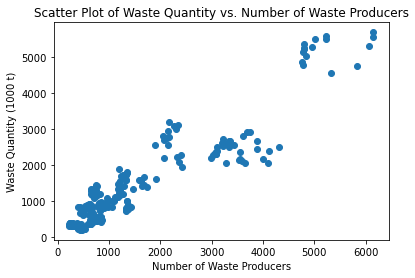

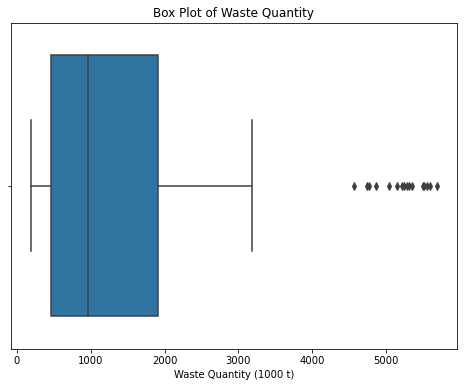

                                                       Year   \
Year                                                1.000000   
Number of Waste Producers                          -0.020871   
Waste Quantity (1000 t)                             0.052809   
Waste Quantity Handed Over to Primary Producers... -0.061445   

                                                    Number of Waste Producers  \
Year                                                                -0.020871   
Number of Waste Producers                                            1.000000   
Waste Quantity (1000 t)                                              0.930601   
Waste Quantity Handed Over to Primary Producers...                   0.768639   

                                                    Waste Quantity (1000 t)  \
Year                                                               0.052809   
Number of Waste Producers                                          0.930601   
Waste Quantity (1000 t)             

In [16]:
print(df.isnull().sum())

print(df.describe())

plt.hist(df['Waste Quantity (1000 t)'], bins=20, edgecolor='k')
plt.xlabel('Waste Quantity (1000 t)')
plt.ylabel('Frequency')
plt.title('Histogram of Waste Quantity')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Federal State ', y='Number of Waste Producers', data=df)
plt.xticks(rotation=90)
plt.xlabel('Federal State')
plt.ylabel('Number of Waste Producers')
plt.title('Number of Waste Producers by Federal State')
plt.show()

plt.scatter(df['Number of Waste Producers'], df['Waste Quantity (1000 t)'])
plt.xlabel('Number of Waste Producers')
plt.ylabel('Waste Quantity (1000 t)')
plt.title('Scatter Plot of Waste Quantity vs. Number of Waste Producers')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Waste Quantity (1000 t)'])
plt.xlabel('Waste Quantity (1000 t)')
plt.title('Box Plot of Waste Quantity')
plt.show()

correlation_matrix = df.corr()
print(correlation_matrix)

state_waste_total = df.groupby('Federal State ')['Waste Quantity (1000 t)'].sum().reset_index()
print(state_waste_total)

df['Waste Per Producer'] = df['Waste Quantity (1000 t)'] / df['Number of Waste Producers']
print(df[['Federal State ', 'Waste Per Producer']])

threshold = 3000  
df_filtered = df[df['Waste Quantity (1000 t)'] <= threshold]

from scipy.stats import ttest_ind
state_A = df[df['Federal State '] == 'State_A']['Waste Quantity (1000 t)']
state_B = df[df['Federal State '] == 'State_B']['Waste Quantity (1000 t)']
t_stat, p_value = ttest_ind(state_A, state_B)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

state_waste_handed_over = df.groupby('Federal State ')['Waste Quantity Handed Over to Primary Producers (1000 t)'].sum().reset_index()
print(state_waste_handed_over)


In [17]:
Q1 = df['Waste Quantity (1000 t)'].quantile(0.25)
Q3 = df['Waste Quantity (1000 t)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Waste Quantity (1000 t)'] < lower_bound) | (df['Waste Quantity (1000 t)'] > upper_bound)]
print(outliers)

     Year        Federal State   Number of Waste Producers  \
9     2006  Nordrhein-Westfalen                     6143.0   
25    2007  Nordrhein-Westfalen                     6149.0   
41    2008  Nordrhein-Westfalen                     6067.0   
57    2009  Nordrhein-Westfalen                     5823.0   
73    2010  Nordrhein-Westfalen                     5330.0   
89    2011  Nordrhein-Westfalen                     4836.0   
105   2012  Nordrhein-Westfalen                     4787.0   
121   2013  Nordrhein-Westfalen                     4766.0   
137   2014  Nordrhein-Westfalen                     4776.0   
153   2015  Nordrhein-Westfalen                     4808.0   
169   2016  Nordrhein-Westfalen                     4801.0   
185   2017  Nordrhein-Westfalen                     4800.0   
201   2018  Nordrhein-Westfalen                     4952.0   
217   2019  Nordrhein-Westfalen                     5023.0   
233   2020  Nordrhein-Westfalen                     5232.0   
249   20

In [18]:
total_data_points = len(df)  
num_outliers = len(outliers) 

percentage_outliers = (num_outliers / total_data_points) * 100


In [19]:
total_data_points = len(df)  
num_outliers = len(outliers)  

percentage_outliers = (num_outliers / total_data_points) * 100

print(f"Percentage of data in the outlier area: {percentage_outliers:.2f}%")


Percentage of data in the outlier area: 6.25%


In [20]:

state_statistics = df.groupby('Federal State ').agg({
    'Number of Waste Producers': 'sum',
    'Waste Quantity (1000 t)': 'sum',
    'Waste Quantity Handed Over to Primary Producers (1000 t)': 'sum'
}).reset_index()

state_statistics.columns = ['Federal State ', 'Total Waste Producers', 'Total Waste Quantity (1000 t)', 'Total Waste Handed Over (1000 t)']

print(state_statistics)


            Federal State   Total Waste Producers  \
0        Baden-Württemberg                52512.0   
1                   Bayern                58196.0   
2                   Berlin                13287.0   
3              Brandenburg                14104.0   
4                   Bremen                 4361.0   
5                  Hamburg                 7882.0   
6                   Hessen                22530.0   
7   Mecklenburg-Vorpommern                 6695.0   
8            Niedersachsen                35286.0   
9      Nordrhein-Westfalen                83514.0   
10         Rheinland-Pfalz                21344.0   
11                Saarland                 5374.0   
12                 Sachsen                21153.0   
13          Sachsen-Anhalt                11370.0   
14      Schleswig-Holstein                12453.0   
15               Thüringen                10387.0   

    Total Waste Quantity (1000 t)  Total Waste Handed Over (1000 t)  
0                         38

In [27]:
data.head()

,Unnamed: 0,year,code,type of waste,waste producers,waste quantities,waste quantities generated by primary producers
0,0,2006,EAV-01,"Wastes resulting from exploration, mining of ...",26.0,140.6,139.5
1,1,2006,EAV-010304-G,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,2,2006,EAV-010305-G,Other tailings containing hazardous substances,0.0,0.0,0.0
3,3,2006,EAV-010307-G,"Wastes from phys.,chem. proc. of metal. minerals",0.0,0.0,0.0
4,4,2006,EAV-010407-G,"Wastes from phys.,chem. proc. of non-met. min...",3.0,0.4,0.4


In [28]:
data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Unnamed: 0,year,code,type of waste,waste producers,waste quantities,waste quantities generated by primary producers
0,0,2006,EAV-01,"Wastes resulting from exploration, mining of ...",26.0,140.6,139.5
1,1,2006,EAV-010304-G,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,2,2006,EAV-010305-G,Other tailings containing hazardous substances,0.0,0.0,0.0
3,3,2006,EAV-010307-G,"Wastes from phys.,chem. proc. of metal. minerals",0.0,0.0,0.0
4,4,2006,EAV-010407-G,"Wastes from phys.,chem. proc. of non-met. min...",3.0,0.4,0.4


In [24]:
data.isnull().sum()

Unnamed: 0                                         0
year                                               0
code                                               0
type of waste                                      0
waste producers                                    0
waste quantities                                   0
waste quantities generated by primary producers    0
dtype: int64

Year: The year in which the data is reported (e.g., 2006).

Code: A code or identifier for the type of waste.

Type of Waste: A description of the waste category.

Waste Producers: The number of entities or producers responsible for generating this type of waste.

Waste Quantities: The total quantity of waste generated.

Waste Quantities Generated by Primary Producers: The amount of waste handed over to primary producers for further processing or management.

In [30]:
data = data.iloc[:, 1:]
data.head()

,year,code,type of waste,waste producers,waste quantities,waste quantities generated by primary producers
0,2006,EAV-01,"Wastes resulting from exploration, mining of ...",26.0,140.6,139.5
1,2006,EAV-010304-G,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,2006,EAV-010305-G,Other tailings containing hazardous substances,0.0,0.0,0.0
3,2006,EAV-010307-G,"Wastes from phys.,chem. proc. of metal. minerals",0.0,0.0,0.0
4,2006,EAV-010407-G,"Wastes from phys.,chem. proc. of non-met. min...",3.0,0.4,0.4


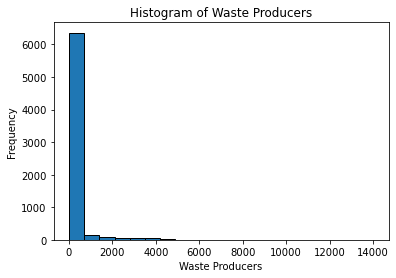

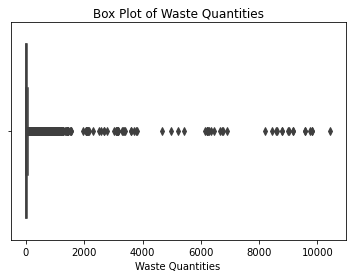

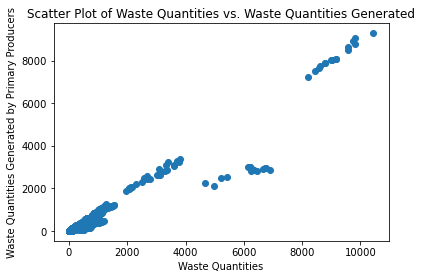

In [33]:
plt.hist(data['waste producers'], bins=20, edgecolor='k')
plt.xlabel('Waste Producers')
plt.ylabel('Frequency')
plt.title('Histogram of Waste Producers')
plt.show()

sns.boxplot(x=data['waste quantities'])
plt.xlabel('Waste Quantities')
plt.title('Box Plot of Waste Quantities')
plt.show()

plt.scatter(data['waste quantities'], data['waste quantities generated by primary producers'])
plt.xlabel('Waste Quantities')
plt.ylabel('Waste Quantities Generated by Primary Producers')
plt.title('Scatter Plot of Waste Quantities vs. Waste Quantities Generated')
plt.show()


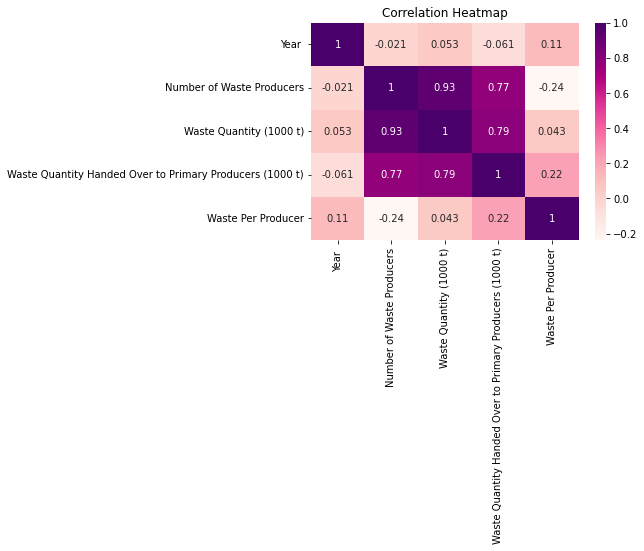

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
waste_type_stats = data.groupby('type of waste').agg({
    'waste producers': 'sum',
    'waste quantities': 'sum',
    'waste quantities generated by primary producers': 'sum'
}).reset_index()

waste_type_stats.columns = ['Type of Waste', 'Total Waste Producers', 'Total Waste Quantity', 'Total Waste Handed Over']


In [44]:
waste_type_stats.head()

,Type of Waste,Total Waste Producers,Total Waste Quantity,Total Waste Handed Over
0,"Absorbents, filter materials, wiping cloths etc.",34423.0,3203.7,2317.7
1,Acid-generating tailings from proc.of sulphid...,0.0,0.0,0.0
2,Activated carbon from chlorine production,16.0,0.0,0.0
3,Adhesive and sealant sludges cont.organic sol...,162.0,6.2,5.5
4,"Adhesives, sealants: Rosin oil",0.0,0.0,0.0


In [48]:
waste_type_stats['Type of Waste'].unique()

array([' Absorbents, filter materials, wiping cloths etc.',
       ' Acid-generating tailings from proc.of sulphide ore',
       ' Activated carbon from chlorine production',
       ' Adhesive and sealant sludges cont.organic solvents',
       ' Adhesives, sealants: Rosin oil',
       ' Adhesives,sealants: Aqueous liquid waste cont.adh.',
       ' Adhesives,sealants: Aqueous sludges cont.adhesives',
       ' Agrochemical waste containing hazardous substances',
       ' Aluminium: Black dross from secondary production',
       ' Aluminium: Primary production slags',
       ' Aluminium: Salt slags from secondary production',
       ' Aluminium: Skimmings that are flammable etc.',
       ' Aluminium: Sludges, filter cakes from gas treatment.',
       ' Aluminium: Tar-containing wastes from anode manuf.',
       ' Aluminium: Wastes fr.cooling-water treatm.cont.oil',
       ' Aluminium: Wastes from treatment. of salt slags etc.',
       ' Aluminum: Flue-gas dust cont. hazardous subst.',
   